# Testing the `LT_signature` module

## Setting stuff up

In [1]:
%matplotlib inline
%load_ext pycodestyle_magic

In [2]:
%%pycodestyle
# display full output, not only last result, except ended with semicolon
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.display import Image, SVG

In [3]:
# Uncomment if you want to see all the messages generated by gaknot package.

import logging
import sys

logging.basicConfig(
    level=logging.INFO,
    format='%(levelname)s: %(message)s',
    stream=sys.stdout,
    force=True
)

In [4]:
from IPython.core.magic import register_line_magic
import os
import path
from gaknot.utility import import_sage

@register_line_magic
def preparse(line):
    """
    Custom magic to preparse a sage file using the gaknot utility logic.
    Usage: %preparse signature
    """
    # Assuming 'gaknot' is in the current directory or python path
    import os
    package_name = 'gaknot'
    # Get the path to the package
    path = os.path.dirname(os.path.abspath(package_name))
    
    try:
        import_sage(line.strip(), package=package_name, path=path)
        print(f"Successfully preparsed and reloaded: {line}")
    except Exception as e:
        print(f"Error during preparse: {e}")

# Registering the magic
# del preparse # Optional: allows re-running this cell to update the magic
register_line_magic(preparse)

INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function
INFO: 

import_sage called with arguments:
	module_name: cable_signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function
INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	path: ../
INFO: 

import_sage called with arguments:
	module_name: main
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function
INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	path: ../
INFO: 

import_sage called with arguments:
	module_name: cable_signature
	package: gaknot
	path: ../
INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	pa

<function preparse at 0x15b1ca020>

In [5]:
def torus_knot_desc_to_txt(desc):
    if not isinstance(desc, (list, tuple)):
        raise TypeError(f'The desc parameter must be a list or a tuple. Got: {type(desc)}.')
    if len(desc) != 2:
        raise ValueError(f'The desc parameter must be of length 2. Got len(desc) = {len(desc)}.')

    return f'T({desc[0]}, {desc[1]})'

def it_torus_knot_desc_to_txt(desc):
    if not isinstance(desc, (list, tuple)):
        raise TypeError(f'The desc parameter must be a list or a tuple. Got: {type(desc)}.')
    return 'T(' + '; '.join([str(a) + ',' + str(b) for a,b in desc]) + ')'
    

def gaknot_desc_to_txt(desc):
    """
    This is a small helper function, which converts the description of a generalized algebraic knot to its text form.
    For example:
    desc = [
        (1,[(2,3), (2,5), (3,4)]),
        (-1, [(5,2), (3,7)])
    ]
    Corresponds to the T(2,3;2,5;3,4) # -T(5,2;3,7) knot.
    """
    return ' # '.join(['-' * (int(1-sign) // 2) + it_torus_knot_desc_to_txt(knot_desc) for sign, knot_desc in desc])

In [6]:
torus_knot_desc_to_txt((2,3)), torus_knot_desc_to_txt([3,4])

('T(2, 3)', 'T(3, 4)')

In [7]:
it_torus_knot_desc_to_txt([(2,3), (3,4), [4,5]])

'T(2,3; 3,4; 4,5)'

In [8]:
gaknot_desc_to_txt([
    (1, [(2,3), (6,5)]),
    (-1, [(3,4), (7, 9)])
])

'T(2,3; 6,5) # -T(3,4; 7,9)'

## Tests

### Testing the `LT_signature_torus_knot` function

In [9]:
%preparse LT_signature
from gaknot.LT_signature import LT_signature_torus_knot

LT_signature_torus_knot(2,3)

INFO: 

import_sage called with arguments:
	module_name: LT_signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function/notebooks
INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function/gaknot
Successfully preparsed and reloaded: LT_signature


0: 0, 1/6: -1, 5/6: 1, 1: 0.

In [10]:
LT_signature_torus_knot(5,3)

0: 0, 1/15: -1, 2/15: -1, 4/15: -1, 7/15: -1, 8/15: 1, 11/15: 1, 13/15: 1, 14/15: 1, 1: 0.

In [11]:
s = LT_signature_torus_knot(7,8)
print(s)
s.total_sign_jump()

0: 0
1/56: -1
1/28: -1
3/56: -1
1/14: -1
5/56: -1
3/28: -1
9/56: -1
5/28: -1
11/56: -1
3/14: -1
13/56: -1
15/56: 1
17/56: -1
9/28: -1
19/56: -1
5/14: -1
11/28: 1
23/56: 1
25/56: -1
13/28: -1
27/56: -1
29/56: 1
15/28: 1
31/56: 1
33/56: -1
17/28: -1
9/14: 1
37/56: 1
19/28: 1
39/56: 1
41/56: -1
43/56: 1
11/14: 1
45/56: 1
23/28: 1
47/56: 1
25/28: 1
51/56: 1
13/14: 1
53/56: 1
27/28: 1
55/56: 1
1: 0



0

INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function/notebooks
Successfully preparsed and reloaded: signature


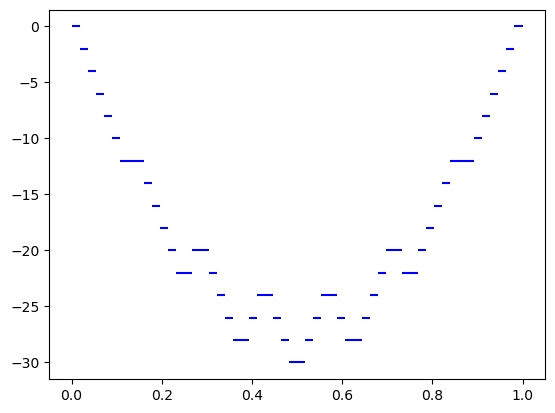

In [12]:
%preparse signature
from gaknot.signature import SignaturePloter

SignaturePloter.plot(s)

In [13]:
# verify the value of the signature function at 1/2, 1/3 and 2/3
s(1/2), s(1/3), s(2/3)

(-30, -24, -24)

In [14]:
try:
    LT_signature_torus_knot(3,6)
except ValueError as e:
    print(f'Caught the ValueError exception: {e}')
else:
    raise Exception(f'The constructor of the LT_signature class should have thrown a ValueError.')

Caught the ValueError exception: Parameteres p and q must be relatively prime. Got gcd=3.


In [15]:
import path
from gaknot.utility import import_sage

lt_sig = import_sage('LT_signature', package='gaknot', path=path.module_path)
ff = lt_sig.LT_signature_torus_knot(4,5)

INFO: 

import_sage called with arguments:
	module_name: LT_signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function
INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function/gaknot


In [16]:
ff

0: 0, 1/20: -1, 1/10: -1, 3/20: -1, 3/10: -1, 7/20: -1, 9/20: 1, 11/20: -1, 13/20: 1, 7/10: 1, 17/20: 1, 9/10: 1, 19/20: 1, 1: 0.

In [17]:
for i in range(3,20,2):
    sig1 = LT_signature_torus_knot(2,i)
    sig2 = LT_signature_torus_knot(i,2)
    print(f'Comparing signature of T(2,{i}) and T({i},2): {sig1 == sig2}.')

Comparing signature of T(2,3) and T(3,2): True.
Comparing signature of T(2,5) and T(5,2): True.
Comparing signature of T(2,7) and T(7,2): True.
Comparing signature of T(2,9) and T(9,2): True.
Comparing signature of T(2,11) and T(11,2): True.
Comparing signature of T(2,13) and T(13,2): True.
Comparing signature of T(2,15) and T(15,2): True.
Comparing signature of T(2,17) and T(17,2): True.
Comparing signature of T(2,19) and T(19,2): True.


### Testing the `LT_signature_iterated_torus_knot` function

In [18]:
%preparse LT_signature
from gaknot.LT_signature import LT_signature_iterated_torus_knot

# (6,5)-cable of T(2,3)
iterated_sig = LT_signature_iterated_torus_knot([(2,3), (6,5)])
print(iterated_sig)

INFO: 

import_sage called with arguments:
	module_name: LT_signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function/notebooks
INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function/gaknot
Successfully preparsed and reloaded: LT_signature
0: 0
1/36: -1
1/30: -1
1/15: -1
1/10: -1
2/15: -1
5/36: 1
7/36: -1
7/30: -1
4/15: -1
3/10: -1
11/36: 1
13/36: -1
11/30: 1
13/30: -1
7/15: -1
17/36: 1
19/36: -1
8/15: 1
17/30: 1
19/30: -1
23/36: 1
25/36: -1
7/10: 1
11/15: 1
23/30: 1
29/36: 1
31/36: -1
13/15: 1
9/10: 1
14/15: 1
29/30: 1
35/36: 1
1: 0



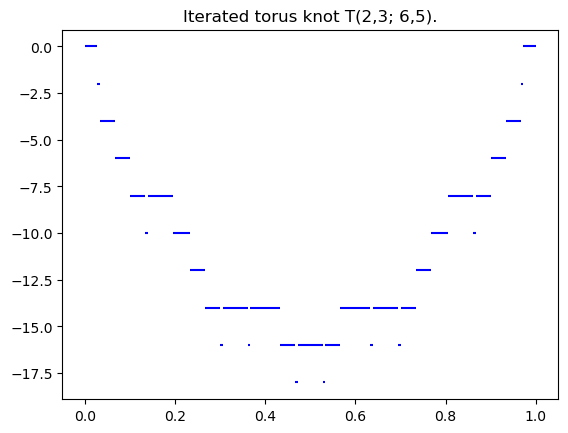

In [19]:
SignaturePloter.plot(iterated_sig, title=f'Iterated torus knot {it_torus_knot_desc_to_txt([(2,3), (6,5)])}.')

### Testing the `LT_signature_generalized_algebraic_knot` function

In [20]:
%preparse LT_signature
from gaknot.LT_signature import LT_signature_generalized_algebraic_knot

# T(2,3) # -T(2,3)
# This should result in the zero function
desc = [
    (1,  [(2,3)]), 
    (-1, [(2,3)])
]

zero_sig = LT_signature_generalized_algebraic_knot(desc)
print(f"Is zero everywhere? {zero_sig.is_zero_everywhere()}")
# Expected Output: True

INFO: 

import_sage called with arguments:
	module_name: LT_signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function/notebooks
INFO: 

import_sage called with arguments:
	module_name: signature
	package: gaknot
	path: /Users/wojtek/Library/CloudStorage/GoogleDrive-w.politarczyk@uw.edu.pl/My Drive/mat/git-projects/signature_function/gaknot
Successfully preparsed and reloaded: LT_signature
Is zero everywhere? True


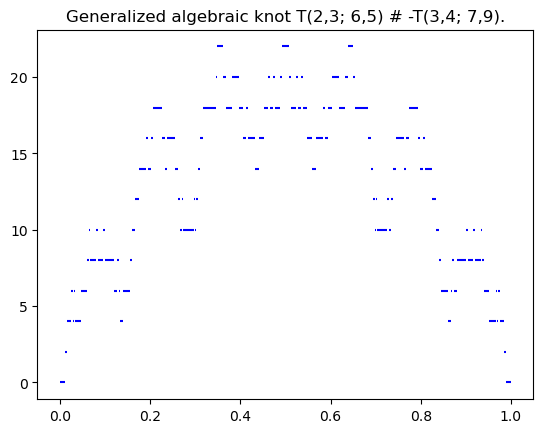

In [21]:
# T(2,3;6,5) # -T(3,4;7,9)
desc = [
    (1, [(2,3), (6,5)]),
    (-1, [(3,4), (7, 9)])
]

sig = LT_signature_generalized_algebraic_knot(desc)

SignaturePloter.plot(sig, title=f"Generalized algebraic knot {gaknot_desc_to_txt(desc)}.")

In [22]:
desc = [
    (1, [(2,3), (5,2)]),
    (1, [(3,2)]),
    (1, [(5,3)]),
    (-1, [(6,5)])
]

sig = LT_signature_generalized_algebraic_knot(desc)

sig.is_zero_everywhere()

True

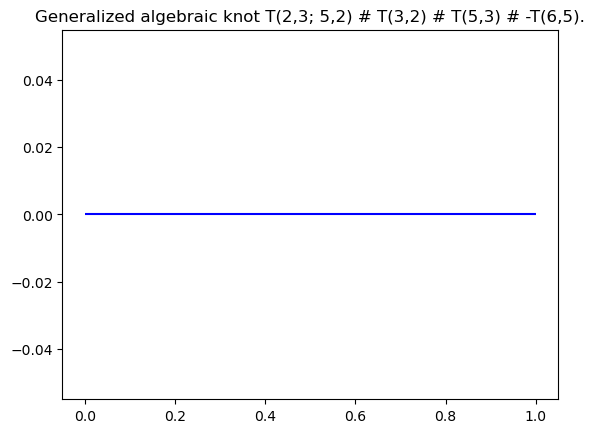

In [23]:
SignaturePloter.plot(sig, title=f"Generalized algebraic knot {gaknot_desc_to_txt(desc)}.")